### Squidpy analysis

In [1]:
import squidpy as sq
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import warnings
import os
import cv2

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\spatialdata\__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
#set up the base directory
base_dir = 'C:\\Users\\Peter\\Documents\\Internship_DKFZ\\Visual_coding_studio\\ark-analysis-0.6.3\\data\\preprint\\2023-07-18-KK-BC25_21_1_KK003'
#set up the directory with the cell tables after running cellpose
cell_table_dir = os.path.join(base_dir, "segmentation\\cell_table")

In [3]:
####read in anndata object, if you want to start from here
#set up the base directory
base_dir = 'C:\\Users\\Peter\\Documents\\Internship_DKFZ\\Visual_coding_studio\\ark-analysis-0.6.3\\data\\preprint\\2023-07-18-KK-BC25_21_1_KK003'
#set up the directory with the cell tables after running cellpose
cell_table_dir = os.path.join(base_dir, "segmentation\\cell_table")
image_dir = os.path.join(base_dir, "image_data\\")

In [4]:
adata = ad.read_h5ad(os.path.join(cell_table_dir,('cell_table_anndata_analysis_mesmerv2.h5ad')))

In [5]:
adata

AnnData object with n_obs × n_vars = 24999 × 37
    obs: 'label', 'fov', 'roi', 'X', 'Y', 'cell_size', 'scyan_pop', 'scyan_pop_Level_3', 'scyan_pop_Level_2', 'scyan_pop_Level_1', 'color', 'equivalent_diameter', 'area'
    uns: 'scyan_pop_colors'

In [6]:
adata.obs.head()

,label,fov,roi,X,Y,cell_size,scyan_pop,scyan_pop_Level_3,scyan_pop_Level_2,scyan_pop_Level_1,color,equivalent_diameter,area
0,1.0,2023-07-18-KK-BC25_21_1_FOV1,BC25_21_1_FOV1,2.733333,818.466667,120.0,Macrophages,Mono/Mac,Myeloid,Immune,lightgray,12.360774,120.0
1,2.0,2023-07-18-KK-BC25_21_1_FOV1,BC25_21_1_FOV1,2.261538,920.184615,65.0,CAV+ Fibroblasts,Fibroblasts,Stroma,Non-immune,lightgray,9.097284,65.0
2,3.0,2023-07-18-KK-BC25_21_1_FOV1,BC25_21_1_FOV1,3.295082,937.180328,61.0,CAV+ Fibroblasts,Fibroblasts,Stroma,Non-immune,lightgray,8.812923,61.0
3,4.0,2023-07-18-KK-BC25_21_1_FOV1,BC25_21_1_FOV1,3.879518,396.066265,166.0,CD4,T cells,Lymphoid,Immune,lightgray,14.538149,166.0
4,5.0,2023-07-18-KK-BC25_21_1_FOV1,BC25_21_1_FOV1,4.360360,454.324324,111.0,CD4,T cells,Lymphoid,Immune,lightgray,11.888212,111.0


In [24]:
# Create a spatial basis from X and Y columns
spatial_coords = adata.obs[['Y', 'X']].values
adata.obsm['spatial'] = spatial_coords

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Peter\

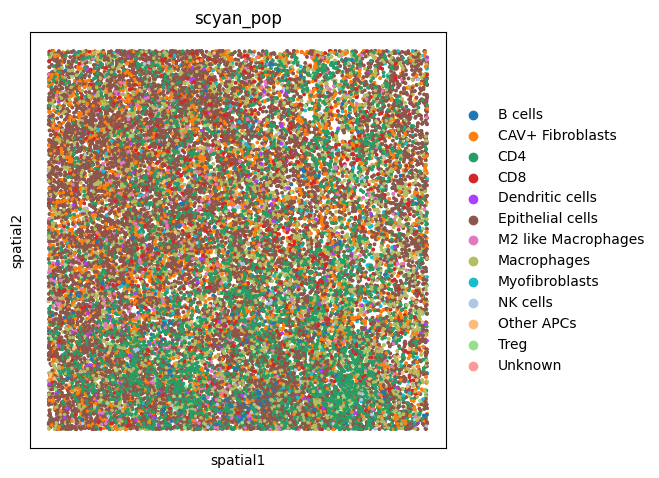

In [25]:
sq.pl.spatial_scatter(adata, shape=None, color="scyan_pop", size=10)

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Peter\

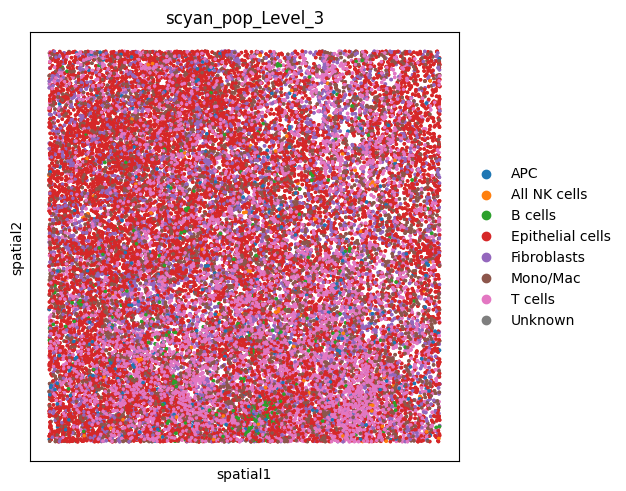

In [26]:
sq.pl.spatial_scatter(adata, shape=None, color="scyan_pop_Level_3", size=10)

### FOV1

In [27]:
adata_FOV1 = adata[adata.obs['roi'] == 'BC25_21_1_FOV1']

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [28]:
adata

AnnData object with n_obs × n_vars = 24999 × 37
    obs: 'label', 'fov', 'roi', 'X', 'Y', 'cell_size', 'scyan_pop', 'scyan_pop_Level_3', 'scyan_pop_Level_2', 'scyan_pop_Level_1', 'color', 'equivalent_diameter', 'area'
    uns: 'scyan_pop_colors', 'scyan_pop_Level_3_colors'
    obsm: 'spatial'

In [29]:
adata_FOV1

View of AnnData object with n_obs × n_vars = 3950 × 37
    obs: 'label', 'fov', 'roi', 'X', 'Y', 'cell_size', 'scyan_pop', 'scyan_pop_Level_3', 'scyan_pop_Level_2', 'scyan_pop_Level_1', 'color', 'equivalent_diameter', 'area'
    uns: 'scyan_pop_colors', 'scyan_pop_Level_3_colors'
    obsm: 'spatial'

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_color_utils.py:26: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_acti

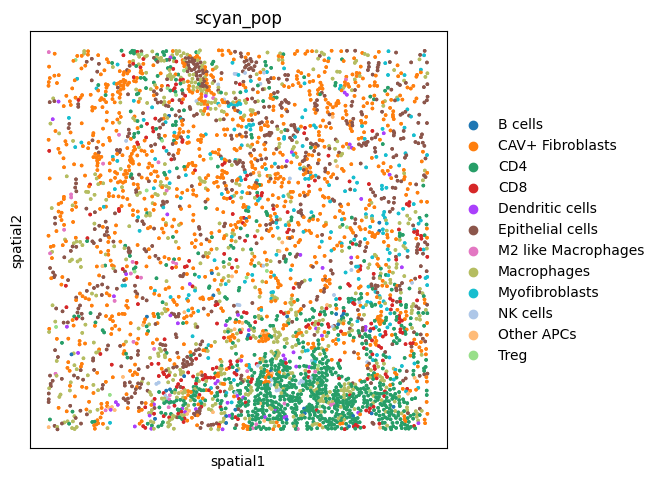

In [30]:
sq.pl.spatial_scatter(adata_FOV1, shape=None, color="scyan_pop", size=10)

### FOV1 - IL10

In [42]:
adata_FOV1_filtered = adata_FOV1[(adata_FOV1.obs['scyan_pop'] == 'Treg') | (adata_FOV1.obs['scyan_pop'] == 'M2 like Macrophages')]

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Peter\

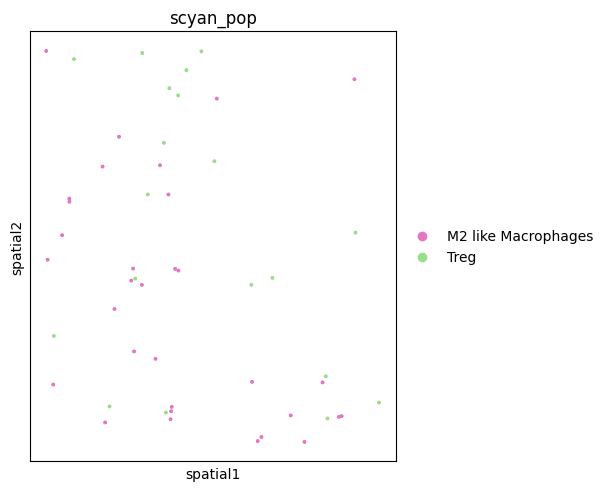

In [44]:
sq.pl.spatial_scatter(adata_FOV1_filtered, shape=None, color="scyan_pop", size=10)

### FOV2

In [37]:
adata_FOV2 = adata[adata.obs['roi'] == 'BC25_21_1_FOV2']

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [38]:
adata_FOV2

View of AnnData object with n_obs × n_vars = 5573 × 37
    obs: 'label', 'fov', 'roi', 'X', 'Y', 'cell_size', 'scyan_pop', 'scyan_pop_Level_3', 'scyan_pop_Level_2', 'scyan_pop_Level_1', 'color', 'equivalent_diameter', 'area'
    uns: 'scyan_pop_colors', 'scyan_pop_Level_3_colors'
    obsm: 'spatial'

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_color_utils.py:26: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_acti

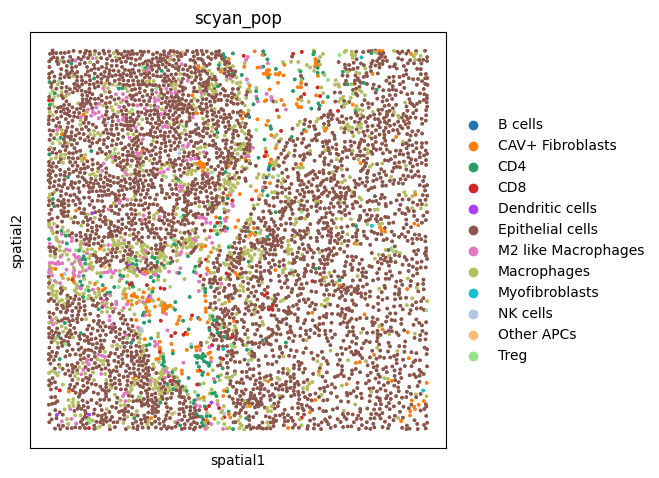

In [39]:
sq.pl.spatial_scatter(adata_FOV2, shape=None, color="scyan_pop", size=10)

### FOV2 - IL10

In [40]:
adata_FOV2_filtered = adata_FOV2[(adata_FOV2.obs['scyan_pop'] == 'Treg') | (adata_FOV2.obs['scyan_pop'] == 'M2 like Macrophages')]

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_color_utils.py:26: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_acti

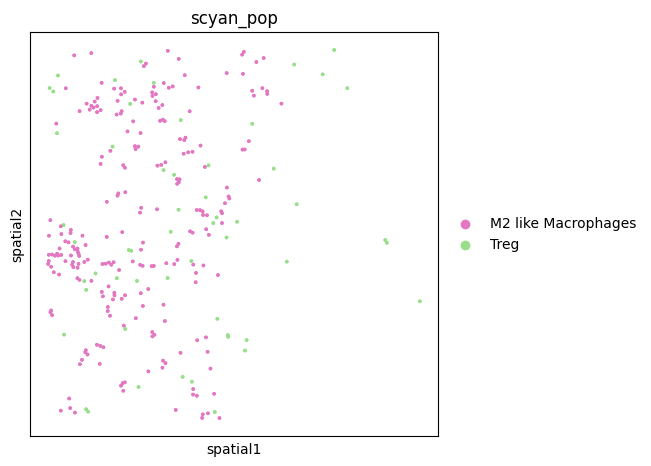

In [41]:
sq.pl.spatial_scatter(adata_FOV2_filtered, shape=None, color="scyan_pop", size=10)

### FOV3

In [45]:
adata_FOV3 = adata[adata.obs['roi'] == 'BC25_21_1_FOV3']

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [46]:
adata_FOV3

View of AnnData object with n_obs × n_vars = 4268 × 37
    obs: 'label', 'fov', 'roi', 'X', 'Y', 'cell_size', 'scyan_pop', 'scyan_pop_Level_3', 'scyan_pop_Level_2', 'scyan_pop_Level_1', 'color', 'equivalent_diameter', 'area'
    uns: 'scyan_pop_colors', 'scyan_pop_Level_3_colors'
    obsm: 'spatial'

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_color_utils.py:26: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_acti

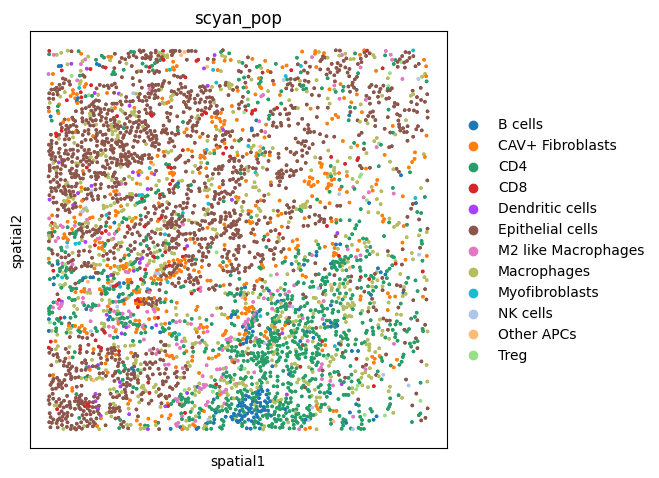

In [47]:
sq.pl.spatial_scatter(adata_FOV3, shape=None, color="scyan_pop", size=10)

### FOV4

In [48]:
adata_FOV4 = adata[adata.obs['roi'] == 'BC25_21_1_FOV4']

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [49]:
adata_FOV4

View of AnnData object with n_obs × n_vars = 3392 × 37
    obs: 'label', 'fov', 'roi', 'X', 'Y', 'cell_size', 'scyan_pop', 'scyan_pop_Level_3', 'scyan_pop_Level_2', 'scyan_pop_Level_1', 'color', 'equivalent_diameter', 'area'
    uns: 'scyan_pop_colors', 'scyan_pop_Level_3_colors'
    obsm: 'spatial'

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_color_utils.py:26: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_acti

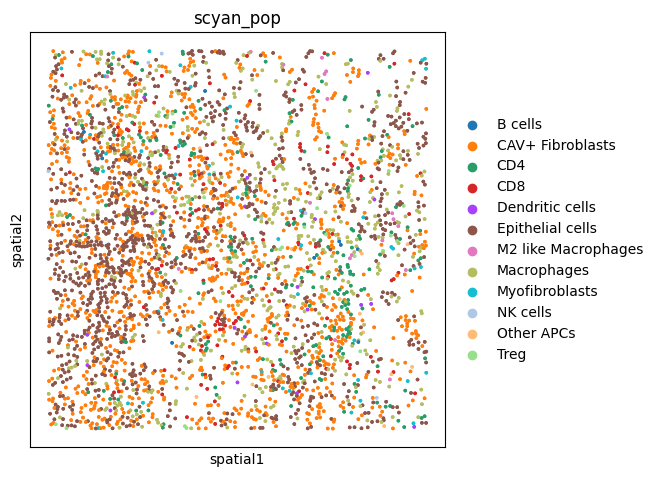

In [50]:
sq.pl.spatial_scatter(adata_FOV4, shape=None, color="scyan_pop", size=10)

### FOV5

In [51]:
adata_FOV5 = adata[adata.obs['roi'] == 'BC25_21_1_FOV5']

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [52]:
adata_FOV5

View of AnnData object with n_obs × n_vars = 3695 × 37
    obs: 'label', 'fov', 'roi', 'X', 'Y', 'cell_size', 'scyan_pop', 'scyan_pop_Level_3', 'scyan_pop_Level_2', 'scyan_pop_Level_1', 'color', 'equivalent_diameter', 'area'
    uns: 'scyan_pop_colors', 'scyan_pop_Level_3_colors'
    obsm: 'spatial'

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_color_utils.py:26: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_acti

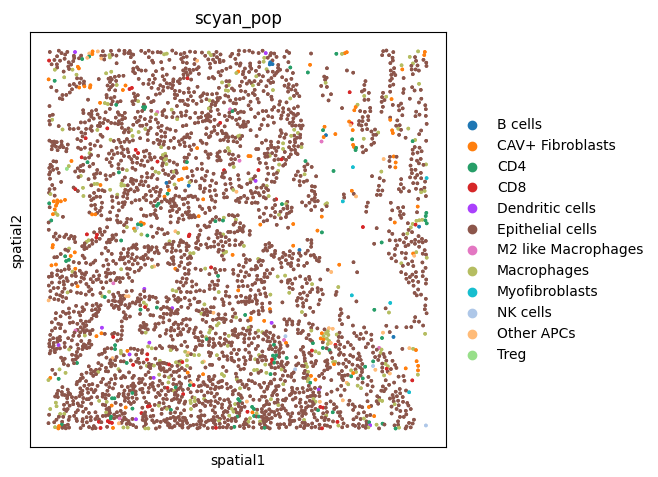

In [53]:
sq.pl.spatial_scatter(adata_FOV5, shape=None, color="scyan_pop", size=10)

### FOV6

In [54]:
adata_FOV6 = adata[adata.obs['roi'] == 'BC25_21_1_FOV6']

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [55]:
adata_FOV6

View of AnnData object with n_obs × n_vars = 4121 × 37
    obs: 'label', 'fov', 'roi', 'X', 'Y', 'cell_size', 'scyan_pop', 'scyan_pop_Level_3', 'scyan_pop_Level_2', 'scyan_pop_Level_1', 'color', 'equivalent_diameter', 'area'
    uns: 'scyan_pop_colors', 'scyan_pop_Level_3_colors'
    obsm: 'spatial'

C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_color_utils.py:26: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Peter\AppData\Roaming\Python\Python311\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_acti

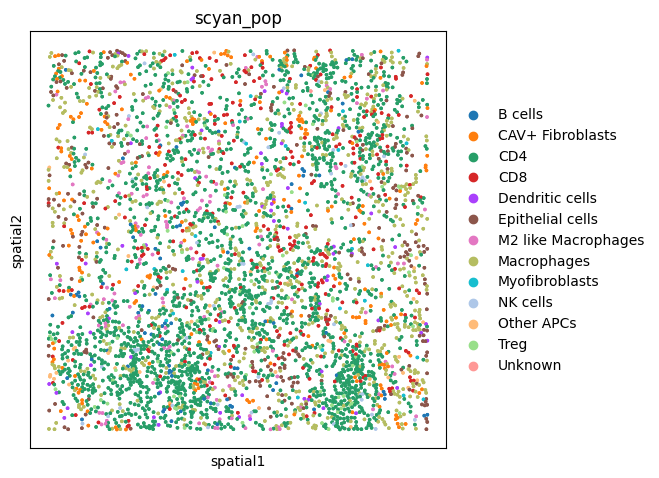

In [56]:
sq.pl.spatial_scatter(adata_FOV6, shape=None, color="scyan_pop", size=10)

## Code Miray

In [42]:
#you can define the fov you want to check:
fov_of_interest = '2023-07-18-KK-BC25_21_1_FOV1'
Fov = adata[adata.obs['fov'].isin([fov_of_interest])]

# then read in the image:
img = cv2.imread(os.path.join(image_dir, fov_of_interest, "IL10.tiff"))

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Then plot the image with the overlay:
fig, ax =  plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(img, cmap='jet')
x = sns.scatterplot(x = Fov.obs['Y'], y = Fov.obs['X'], hue = Fov.obs['cluster?'])
x.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.pyplot.show()

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [31]:
#you can define the fov you want to check:
fov_of_interest = '2023-07-18-KK-BC25_21_1_FOV1'
Fov = adata[adata.obs['fov'].isin([fov_of_interest])]

# then read in the image:
img = cv2.imread(os.path.join(image_dir, fov_of_interest, "CXCL13.tiff"))
img

c:\Users\Peter\anaconda3\envs\analysis_squidpy\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [47]:
# Define the FOV of interest
fov_of_interest = '2023-07-18-KK-BC25_21_1_FOV1'

# Construct the full path to the image file
image_path = os.path.join(image_dir, fov_of_interest, "IL10.tiff")

# Check if the image file exists
if not os.path.isfile(image_path):
    print(f"Image file not found: {image_path}")
else:
    # Read in the image
    img = cv2.imread(image_path)
    
    # Check if the image data is not empty
    if img is None:
        print(f"Failed to read image: {image_path}")
    else:
        # Convert BGR image to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Create a figure and axis for plotting
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        
        # Plot the image
        ax.imshow(img_rgb, cmap='jet', aspect='auto')
        
        # Scatterplot
        scatter = ax.scatter(Fov.obs['Y'], Fov.obs['X'], c=Fov.obs['cluster?'], cmap='jet')
        
        # Add a colorbar for the scatterplot
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Cluster')
        
        # Show the plot
        plt.show()

Failed to read image: C:\Users\Peter\Documents\Internship_DKFZ\Visual_coding_studio\ark-analysis-0.6.3\data\preprint\2023-07-18-KK-BC25_21_1_KK003\image_data\2023-07-18-KK-BC25_21_1_FOV1\IL10.tiff
